<a href="https://colab.research.google.com/github/mmbs1989/DSWP-Aluno/blob/main/PMdarimadol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 8.6MB/s 
     |████████████████████████████████| 9.5MB 22.7MB/s 
     |████████████████████████████████| 2.1MB 59.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [13]:
import pmdarima as pm
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfa = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdolar.csv")
df = df.drop(df.index[314:])
dfa = dfa.drop(dfa.index[314:])
df['dol'] = dfa['dol']
df['dol'] = pd.to_numeric(df['dol'])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

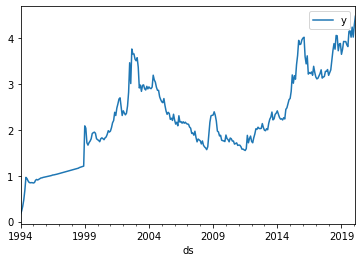

In [60]:
df.plot()

In [61]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.6911517021582294, True)

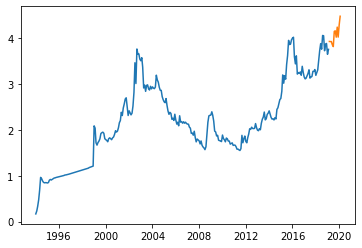

In [62]:
train = df.iloc[:-12].copy()  
test =  df.iloc[-12:].copy() 
plt.plot(train) 
plt.plot(test)

In [63]:
model = pm.auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_q=5, max_d=5, start_P=0, D=1, start_Q=0, max_P=5, 
                      max_Q=5, max_D=5, seasonal= True, m= 12, error_action = 'warn', trace = True, supress_warnings=True, stepwise=True, 
                      random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-143.669, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-218.944, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-141.725, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-250.325, Time=0.82 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=-264.402, Time=1.69 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=-268.501, Time=3.31 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=-276.733, Time=5.90 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=17.51 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=14.18 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=-277.576, Time=2.72 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=-270.022, Time=2.39 sec
 ARIMA(0,1,0)(5,1,1)[12]             : AIC=inf, Time=15.51 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=inf, Time=11.12 sec
 ARIMA(0,1,1)(5,1,0)[12]             : A

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  302
Model:             SARIMAX(0, 1, 0)x(5, 1, 0, 12)   Log Likelihood                 144.788
Date:                            Tue, 02 Feb 2021   AIC                           -277.576
Time:                                    19:21:01   BIC                           -255.577
Sample:                                         0   HQIC                          -268.761
                                            - 302                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.8305      0.053    -15.597      0.000      -0.935      -0.726
ar.S.L24      -0.6726      0.076     -8.858      0.000      -0.821      -0.524
ar.S.L36      -0.4952      0.084     -5.910      0.000      -0.659      -0.331
ar.S.L48      -0.3237      0.073     -4.429      0.000      -0.467      -0.180
ar.S.L60      -0.2047      0.056     -3.660      0.000      -0.314      -0.095
sigma2         0.0206      0.001     24.979      0.000       0.019       0.022
===================================================================================
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):               739.98
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             1.01
Prob(H) (two-sided):                  0.12   Kurtosis:                        10.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
prediction = pd.DataFrame(model.predict(n_periods = 12), index = test.index)
prediction

,0
ds,
2019-03-01,3.750555
2019-04-01,3.724930
2019-05-01,3.858676
2019-06-01,3.828856
2019-07-01,3.855760
2019-08-01,3.959296
2019-09-01,4.012586
2019-10-01,3.955239
2019-11-01,4.046394


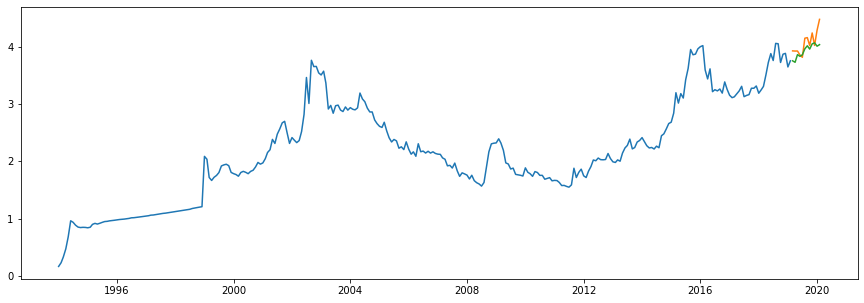

In [66]:
plt.figure(figsize=(15,5))
plt.plot(train, label= "Train")
plt.plot(test, label= 'Test')
plt.plot(prediction, label = 'Previsão')
plt.show()

In [67]:
from sklearn.metrics import r2_score
test['0'] = prediction
r2_score(test['y'], test['0'])

-0.02230636449924983

In [68]:
test = test.drop(columns=['0'])
test

,y
ds,
2019-03-01,3.9238
2019-04-01,3.9207
2019-05-01,3.9218
2019-06-01,3.8518
2019-07-01,3.8125
2019-08-01,4.1445
2019-09-01,4.1551
2019-10-01,4.0174
2019-11-01,4.2364


In [69]:
print(f'RMSE= {mean_squared_error(test, prediction)}')

RMSE= 0.03683994197803564
